In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer



# Gene Gene Interactions
E stands for essential genes and N for nonessential genes.

In [2]:
GxG_data_Costanzo_ExE = pd.read_csv('data/SGA_ExE_clustered.cdt', sep = '\t', dtype = 'str')
GxG_data_Costanzo_ExN = pd.read_csv('data/SGA_ExN_clustered.cdt', sep = '\t', dtype = 'str')
GxG_data_Costanzo_NxN = pd.read_csv('data/SGA_NxN_clustered.cdt', sep = '\t', dtype = 'str')

In [3]:
GxG_data_Costanzo_ExE

,GID,Strain,ORF,Name,Label,GWEIGHT,tsa1167,tsa1197,tsa123,tsa1227,...,tsa560,tsa563,tsa618,tsa895,tsa503,tsa710,tsa733,tsa1239,tsa927,tsa932
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY141X,ARRY166X,ARRY194X,ARRY191X,...,ARRY531X,ARRY533X,ARRY566X,ARRY723X,ARRY489X,ARRY621X,ARRY636X,ARRY204X,ARRY749X,ARRY753X
1,ORF,NaN,NaN,NaN,NaN,NaN,YLL035W,YGL047W,YLR305C,YLR060W,...,YOR244W,YOR244W,YJL081C,YGR002C,YDR303C,YML105C,YDR292C,YDR081C,YOR074C,YOR204W
2,Name,NaN,NaN,NaN,NaN,NaN,GRC3,ALG13,STT4,FRS1,...,ESA1,ESA1,ARP4,SWC4,RSC3,SEC65,SRP101,PDC2,CDC21,DED1
3,Label,NaN,NaN,NaN,NaN,NaN,grc3-5001,alg13-5001,stt4-4,frs1-5001,...,esa1-l254p,esa1-d414,arp4-g161d,swc4-4,rsc3-1,sec65-1,srp101-47,pdc2-5001,cdc21-1,ded1-f144c
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,GENE806X,tsq33,YHR107C,CDC12,cdc12-1,1,-0.021,0.042,0.024,0.035,...,-0.019,0.030,0.156,0.031,0.032,-0.040,-0.024,-0.049,0.006,0.000
1109,GENE112X,tsq1166,YNL118C,DCP2,dcp2-7d,1,-0.016,-0.047,-0.018,0.075,...,0.033,-0.013,0.165,0.105,0.030,-0.081,-0.124,-0.121,-0.178,0.012
1110,GENE1024X,tsq743,YNL118C,DCP2,dcp2-7,1,0.005,-0.108,-0.078,-0.061,...,0.003,-0.054,0.044,-0.014,0.017,-0.195,-0.144,-0.158,-0.023,0.122
1111,GENE661X,tsq2691,YOL149W,DCP1,dcp1-5007,1,0.057,-0.043,-0.184,NaN,...,-0.025,0.042,0.095,NaN,-0.009,0.337,0.029,-0.002,0.110,NaN


In [4]:
GxG_data_Costanzo_ExN

,GID,Strain,ORF,Name,Label,GWEIGHT,dma3509,dma3686,dma3687,dma2759,...,dma647,dma3957,dma4562,dma4038,dma3543,dma449,dma4204,dma715,dma4794,dma4580
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY2045X,ARRY2202X,ARRY2203X,ARRY1406X,...,ARRY3597X,ARRY2407X,ARRY2825X,ARRY2484X,ARRY2077X,ARRY2764X,ARRY2516X,ARRY3652X,ARRY3021X,ARRY2844X
1,ORF,NaN,NaN,NaN,NaN,NaN,YML003W,YMR102C,YMR101C,YKL009W,...,YDL039C,YNL027W,YOR165W,YNL141W,YML048W,YBR289W,YNR014W,YDL131W,YPL037C,YOR172W
2,Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRT1,MRT4,...,PRM7,CRZ1,SEY1,AAH1,GSF2,SNF5,NaN,LYS21,EGD1,YRM1
3,Label,NaN,NaN,NaN,NaN,NaN,yml003w,ymr102c,srt1,mrt4,...,prm7,crz1,sey1,aah1,gsf2,snf5,ynr014w,lys21,egd1,yrm1
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,GENE1711X,sn422,YEL027W,VMA3,vma3,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,GENE1841X,sn4493,YCL005W-A,VMA9,vma9,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,GENE2040X,sn484,YEL051W,VMA8,vma8,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,GENE2047X,sn490,YLR447C,VMA6,vma6,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
GxG_data_Costanzo_NxN

,GID,Strain,ORF,Name,Label,GWEIGHT,dma1605,dma1713,dma1726,dma1727,...,dma1607,dma3143,dma2240,dma2282,dma3242,dma3014,dma936,dma789,dma5078,dma5259
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY430X,ARRY523X,ARRY536X,ARRY537X,...,ARRY432X,ARRY1731X,ARRY985X,ARRY1022X,ARRY1816X,ARRY1627X,ARRY3834X,ARRY3702X,ARRY3262X,ARRY3410X
1,ORF,NaN,NaN,NaN,NaN,NaN,YGL013C,YGL165C,YGL179C,YGL177W,...,YGL009C,YLR040C,YHR207C,YIL059C,YLR183C,YKR103W,YDR131C,YDL187C,YPR093C,YDR502C
2,Name,NaN,NaN,NaN,NaN,NaN,PDR1,NaN,TOS3,NaN,...,LEU1,AFB1,SET5,NaN,TOS4,NFT1,NaN,NaN,ASR1,SAM2
3,Label,NaN,NaN,NaN,NaN,NaN,pdr1,ygl165c,tos3,ygl177w,...,leu1,afb1,set5,yil059c,tos4,nft1,ydr131c,ydl187c,asr1,sam2
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,GENE2551X,sn3952,YGL135W,RPL1B,rpl1b,1,NaN,NaN,NaN,NaN,...,NaN,0.051,0.023,-0.087,-0.029,0.020,-0.030,0.003,-0.011,-0.032
3609,GENE2683X,sn4117,YBR189W,RPS9B,rps9b,1,-0.006,0.004,0.006,0.001,...,-0.015,-0.034,0.004,-0.005,-0.008,-0.007,-0.008,-0.003,-0.012,-0.001
3610,GENE2599X,sn4005,YGL189C,RPS26A,rps26a,1,NaN,NaN,NaN,NaN,...,NaN,-0.012,-0.001,-0.084,0.021,-0.010,0.019,0.032,0.019,0.029
3611,GENE2673X,sn4107,YDR418W,RPL12B,rpl12b,1,0.017,0.018,-0.063,-0.209,...,-0.084,-0.024,0.007,0.029,0.018,0.023,-0.032,-0.024,-0.048,NaN


Converting datasets to gene-gene interaction matrices

In [6]:
def cdt_to_mat(cdt):
    mat = cdt.iloc[5:, 6:].apply(pd.to_numeric, errors="coerce")
    mat.columns = cdt.iloc[1, 6:].values
    mat.index = cdt["ORF"].iloc[5:] 
    mat.index.name = "gene_id"  
    return mat

ExE = cdt_to_mat(GxG_data_Costanzo_ExE)
ExN = cdt_to_mat(GxG_data_Costanzo_ExN)
NxN = cdt_to_mat(GxG_data_Costanzo_NxN)

In [26]:
def visualize_nan_proportion(dataset, color = 'brown', show_proportion = True):

    allowed_nan_proportions = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    gene_counts = []
    size = dataset.shape[1]

    for proportion in allowed_nan_proportions:
        max_nan = (size * proportion) // 100
        filtered_gene_size = len(dataset.loc[:, dataset.isna().sum() <= max_nan].columns)
        gene_counts.append(filtered_gene_size)
        if show_proportion:
            print("Gene count after removing interactions with " + str(proportion) + "% nan values: " + str(filtered_gene_size))
        if (filtered_gene_size == size):
            break

    if show_proportion:
        print("Gene count witout filtering: " + str(len(dataset.columns)))

    nan_proportions = allowed_nan_proportions[0:len(gene_counts)]

    plt.figure(figsize=(8, 5))
    plt.bar(nan_proportions, gene_counts, width=3, color=color, edgecolor='black')

    plt.xlabel('Percentage of Allowed NaN Values')
    plt.ylabel('Remaining Column Count')
    plt.title('Effect of NaN Value Filtering on Column Count')
    plt.xticks(nan_proportions)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
    


## Essential x Essential Interactions

Gene count after removing interactions with 5% nan values: 40
Gene count after removing interactions with 10% nan values: 495
Gene count after removing interactions with 15% nan values: 733
Gene count after removing interactions with 20% nan values: 792
Gene count witout filtering: 792


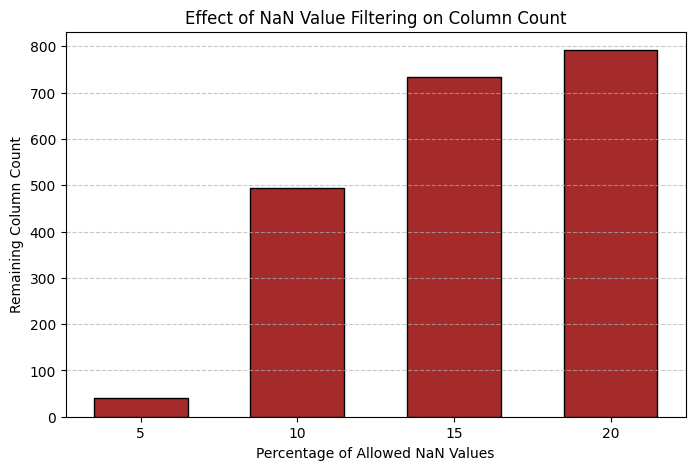

In [22]:
visualize_nan_proportion(ExE)


## Nonessential x Nonessential Interactions

Gene count after removing interactions with 5% nan values: 1
Gene count after removing interactions with 10% nan values: 3167
Gene count after removing interactions with 15% nan values: 3850
Gene count after removing interactions with 20% nan values: 3891
Gene count after removing interactions with 25% nan values: 3892
Gene count witout filtering: 3892


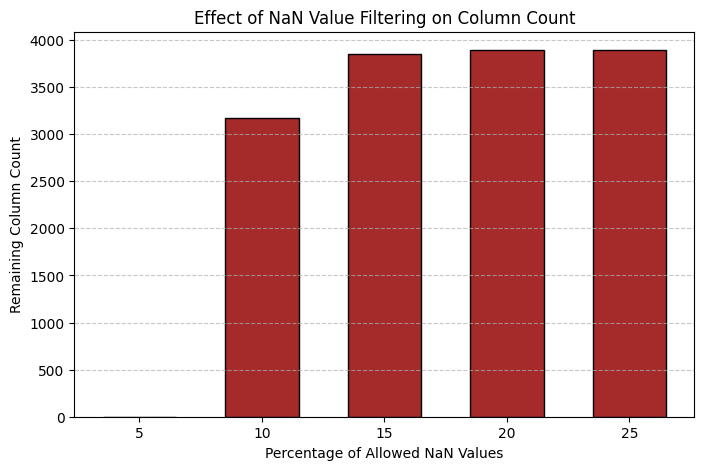

In [23]:
visualize_nan_proportion(NxN)

## Essential x Non-essential Interactions

Gene count after removing interactions with 5% nan values: 0
Gene count after removing interactions with 10% nan values: 0
Gene count after removing interactions with 15% nan values: 0
Gene count after removing interactions with 20% nan values: 0
Gene count after removing interactions with 25% nan values: 0
Gene count after removing interactions with 30% nan values: 790
Gene count after removing interactions with 35% nan values: 792
Gene count after removing interactions with 40% nan values: 792
Gene count after removing interactions with 45% nan values: 792
Gene count after removing interactions with 50% nan values: 1608
Gene count witout filtering: 4684


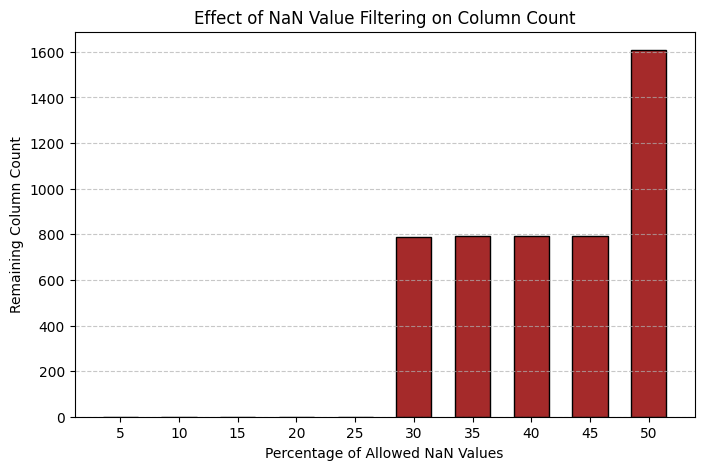

In [24]:
visualize_nan_proportion(ExN)

## Compare ExE, NxN, ExN plots

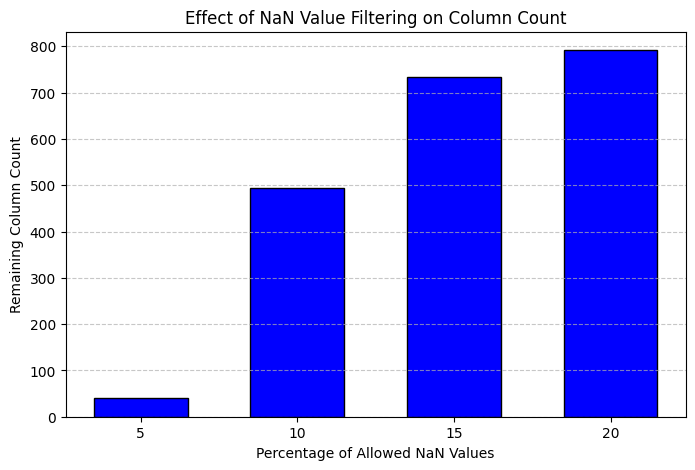

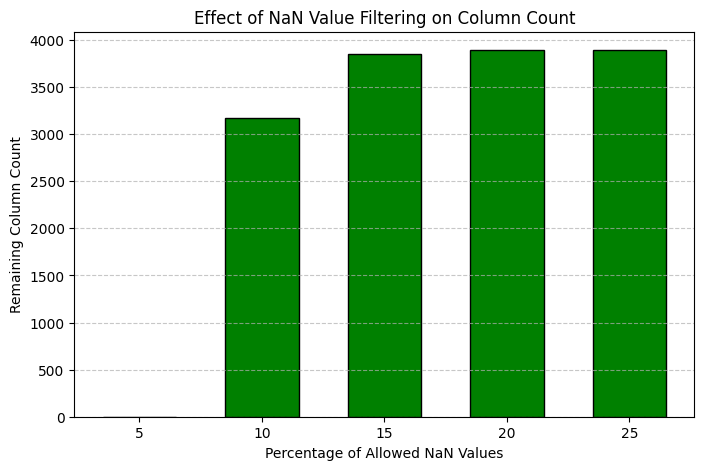

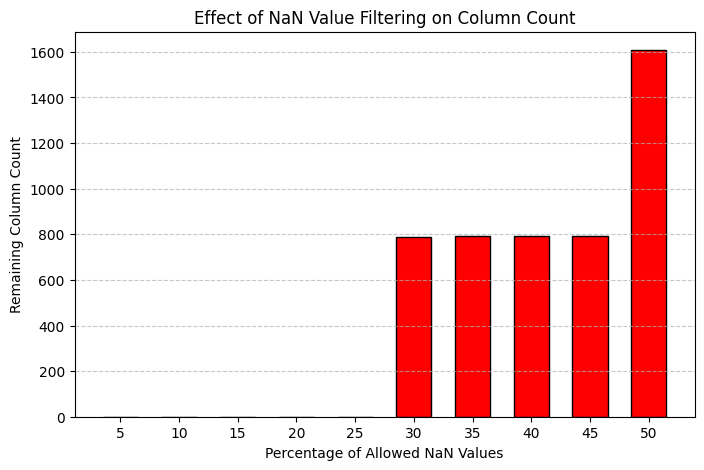

In [27]:
visualize_nan_proportion(ExE, color = 'blue', show_proportion = False)
visualize_nan_proportion(NxN, color = 'green', show_proportion = False)
visualize_nan_proportion(ExN, color = 'red', show_proportion = False)

## Combine all Gene interactions

- All interactions and NaN values filled with mean

In [13]:
all_genes = sorted(set(ExE.index).union(ExE.columns).union(ExN.index).union(ExN.columns).union(NxN.index).union(NxN.columns))
ExE_ = ExE.groupby(by=ExE.index).mean().T.groupby(by=ExE.columns).mean().T.reindex(index=all_genes, columns=all_genes)
ExN_ = ExN.groupby(by=ExN.index).mean().T.groupby(by=ExN.columns).mean().T.reindex(index=all_genes, columns=all_genes)
NxN_ = NxN.groupby(by=NxN.index).mean().T.groupby(by=NxN.columns).mean().T.reindex(index=all_genes, columns=all_genes)

In [14]:
GxG = ExE_.fillna(0) + ExN_.fillna(0) + NxN_.fillna(0)
GxG[(ExE_.isna() & ExN_.isna() & NxN_.isna())] = np.nan

print(f"{GxG.isnull().sum().sum() / GxG.shape[0]**2 * 100:.2f}% NaN values")

GxG_filled = GxG.fillna(GxG.mean()).fillna(0).reset_index()

47.41% NaN values


In [15]:
GxG_filled

,gene_id,YAL001C,YAL002W,YAL004W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,YAL011W,...,YPR193C,YPR194C,YPR195C,YPR196W,YPR197C,YPR198W,YPR199C,YPR200C,YPR201W,YPR202W
0,YAL001C,-0.005324,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0
1,YAL002W,-0.005324,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.02400,-0.025000,0.032000,-0.029000,0.00200,0.022000,-0.029000,-0.063000,-0.015000,0.0
2,YAL004W,-0.005324,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0
3,YAL005C,-0.005324,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0
4,YAL007C,-0.005324,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.00532,0.120000,-0.024000,-0.085000,0.00900,0.012000,0.034000,0.046000,-0.079000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,YPR198W,-0.005324,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0
5703,YPR199C,-0.005324,0.016000,0.035000,0.006000,-0.007000,-0.019000,0.0,-0.042000,-0.068000,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0
5704,YPR200C,-0.109000,-0.006838,-0.003787,-0.006107,-0.000974,0.001078,0.0,-0.003781,-0.009387,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0
5705,YPR201W,-0.005324,-0.026000,-0.043000,0.023000,-0.047000,0.010000,0.0,0.039000,0.073000,...,-0.00532,-0.009088,-0.002238,0.000408,-0.00271,-0.002544,-0.000435,0.000541,-0.001624,0.0


## Extract Data

Using KNN Imputer, as Costanzo's studies (2016 and 2021) indicate that genes with similar functions tend to exhibit similar interactions with other genes.

In [16]:
GxG_filled.to_csv("extracted_data/GxG_filled.csv", index=True)

In [ ]:
# Allow 15% NaN values for ExE
max_nans_15 = (ExE.shape[1] * 15) // 100  
ExE_cleared = ExE.loc[:, ExE.isna().sum() <= max_nans_15]

# Allow 15% NaN values for NxN
max_nans_15 = (NxN.shape[1] * 15) // 100  
NxN_cleared = NxN.loc[:, NxN.isna().sum() <= max_nans_15]

# Allow 30% NaN values for ExN
max_nans_30 = (ExN.shape[1] * 30) // 100
ExN_cleared = ExN.loc[:, ExN.isna().sum() <= max_nans_30]


In [30]:
knn_imputer = KNNImputer(n_neighbors=5) 

ExE_imputed = knn_imputer.fit_transform(ExE_cleared)
NxN_imputed = knn_imputer.fit_transform(NxN_cleared)

ExE_imputed = pd.DataFrame(ExE_imputed, columns=ExE_cleared.columns, index=ExE_cleared.index)
NxN_imputed = pd.DataFrame(NxN_imputed, columns=NxN_cleared.columns, index=NxN_cleared.index)

ExN_filled = ExN_cleared.fillna(ExN_cleared.mean()).fillna(0)


In [31]:
ExE_imputed.to_csv("extracted_data/ExE_imputed.csv", index=True)
NxN_imputed.to_csv("extracted_data/NxN_imputed.csv", index=True)
ExN_filled.to_csv("extracted_data/ExN_filled.csv", index=True)